In [16]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Advertising_Cost_Prediction (1).csv')
df.info()
df.drop(columns=['Ad_ID', 'Platform'], inplace=True)
df.info()
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ad_ID                 900 non-null    object 
 1   Platform              900 non-null    object 
 2   Ad_Spend              830 non-null    float64
 3   Impressions           833 non-null    float64
 4   Clicks                900 non-null    int64  
 5   CTR                   900 non-null    float64
 6   CPC                   900 non-null    float64
 7   Conversion_Rate       900 non-null    float64
 8   Revenue               858 non-null    float64
 9   Target_Audience_Size  900 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ad_Spend 

,0
Ad_Spend,70
Impressions,67
Clicks,0
CTR,0
CPC,0
Conversion_Rate,0
Revenue,42
Target_Audience_Size,0


In [ ]:
`from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


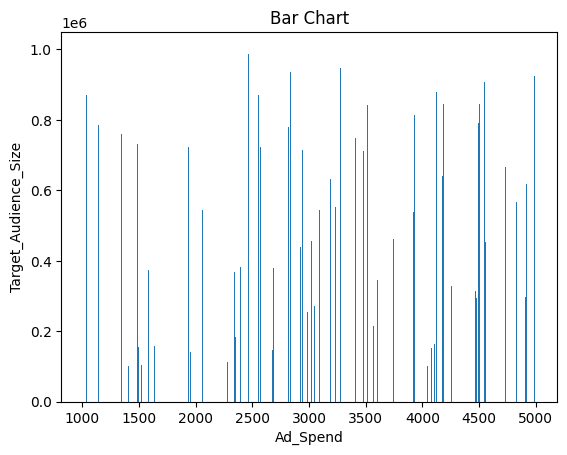

In [20]:
import matplotlib.pyplot as plt
plt.bar(df['Ad_Spend'], df['Target_Audience_Size'])

plt.title("Bar Chart")

plt.xlabel('Ad_Spend')
plt.ylabel('Target_Audience_Size')
plt.show()

In [28]:
df['Ad_Spend'] = df['Ad_Spend'].fillna(df['Ad_Spend'].mean())
df.info()
df.isnull().sum()
df['Impressions'] = df['Impressions'].fillna(df['Impressions'].mean())
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ad_Spend              900 non-null    float64
 1   Impressions           900 non-null    float64
 2   Clicks                900 non-null    float64
 3   CTR                   900 non-null    float64
 4   CPC                   900 non-null    float64
 5   Conversion_Rate       900 non-null    float64
 6   Revenue               858 non-null    float64
 7   Target_Audience_Size  900 non-null    float64
dtypes: float64(8)
memory usage: 56.4 KB


,0
Ad_Spend,0
Impressions,0
Clicks,0
CTR,0
CPC,0
Conversion_Rate,0
Revenue,0
Target_Audience_Size,0


In [30]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 df[num_columns] = scaler.fit_transform(df[num_columns])
 df.info()
 df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ad_Spend              900 non-null    float64
 1   Impressions           900 non-null    float64
 2   Clicks                900 non-null    float64
 3   CTR                   900 non-null    float64
 4   CPC                   900 non-null    float64
 5   Conversion_Rate       900 non-null    float64
 6   Revenue               900 non-null    float64
 7   Target_Audience_Size  900 non-null    float64
dtypes: float64(8)
memory usage: 56.4 KB


,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.497453,0.495784,0.507333,0.494641,0.503557,0.488664,0.494793,0.485574
std,0.268654,0.277513,0.286335,0.285335,0.281607,0.287253,0.282677,0.293462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282293,0.269410,0.252502,0.260837,0.251116,0.237052,0.257245,0.233309
50%,0.497453,0.495784,0.524510,0.495588,0.506850,0.490039,0.494793,0.482707
75%,0.718407,0.731200,0.748979,0.723679,0.736694,0.722759,0.730285,0.747684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
X = df.drop('Ad_Spend', axis=1)
y = df['Ad_Spend']
df.head()

,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
0,0.571806,0.468721,0.831699,0.237764,0.198137,0.961871,0.194140,0.978864
1,0.497453,0.060754,0.478758,0.857537,0.217846,0.270530,0.213706,0.024123
2,0.724852,0.482983,0.526552,0.935679,0.350715,0.220468,0.701800,0.100487
3,0.386357,0.816815,0.980392,0.716689,0.988955,0.660240,0.731157,0.415034
4,0.470274,0.072987,0.785743,0.741787,0.876476,0.996741,0.411684,0.599779


In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')


Mean Squared Error: 0.07512304248535591
Mean Absolute Error: 0.22423525076619777
R-squared: -0.0390065046190442


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')


Mean Squared Error: 0.0787571679953871
Mean Absolute Error: 0.23345983361237235
R-squared: -0.08926911271642601


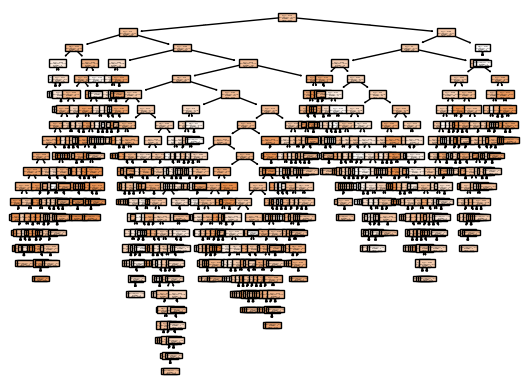

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0], filled= True)
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

# Train a model (this is just an example)
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Now save the trained model
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
